## 10. Sistemas de EDOs: plano de fase e trajetórias

#### 10.1 Introdução

Como sabemos, sistemas de equações diferenciais podem ser aplicados a diversos problemas que envolvem múltiplos componentes relacionados. Por exemplo, os circuitos elétricos, sistemas mecânicos e outros. Nestes casos, existem duas (ou mais) variáveis dependentes e o problema matemático corresponde a sistema de duas (ou mais) equações diferenciais, as quais **sempre podem ser escritas como um sistema de equações de primeira ordem**. Aqui, vamos focar de nossa atenção nos sistemas de tipo mais simples: duas equações lineares de primeira ordem com coeficientes constantes. Nossos objetivos são mostrar os tipos de soluções e como podem ser determinadas e visualizadas  ([Boyce, 2020](https://integrada.minhabiblioteca.com.br/reader/books/9788521637134/epubcfi/6/38%5B%3Bvnd.vst.idref%3Dchapter07%5D!/4/28/2)).


<img src="https://raw.githubusercontent.com/tiagoburiol/MatComp_III/refs/heads/main/Notebook%2010%20-%20Sistemas%20de%20EDOs%2C%20plano%20de%20fase%20e%20trajetoria/imagens/aplicacoes_sistemas.png" width="1000">

<center> Figura 1: Exemplo de aplicações </center>

Sistemas de n equações lineares de primeira ordem têm a forma 
$$
\begin{gathered}
x_1^{\prime}=p_{11}(t) x_1+\cdots+p_{1 n}(t) x_n+g_1(t), \\
\vdots \\
x_n^{\prime}=p_{n 1}(t) x_1+\cdots+p_{n n}(t) x_n+g_n(t)
\end{gathered}
$$

e podem ser representados com notação matricial com a forma
$$
\mathbf{x}^{\prime}=\mathbf{P}(t) \mathbf{x}+\mathbf{g}(t)
$$

em que $x_1 = x_1(t)$, ..., $x_n = x_n(t)$ são componentes de um vetor $\mathbf{x} = \mathbf{x}(t)$. Analogamente, $g_1(t)$, ..., $g_n(t)$ são componentes de um vetor $\mathbf{g}(t)$ e $p_{11}(t)$, ..., $p_{nn}(t)$ são elementos de uma matriz $n \times n$ denotada por $\mathbf{P}(t)$. 

Um vetor $\mathbf{x} = \mathbf{x}(t)$ é uma solução do sistema se satisfizer a equação matricial (equações do sistema). Além disso, se $\mathbf{x}^{(1)}$ e  $\mathbf{x}^{(2)}$ forem soluções do sistema, então a combinação linear $c_1 \mathbf{x}^{(1)}+c_2 \mathbf{x}^{(2)}$ também será solução, quaisquer que sejam as constantes $c_1$ e $c_2$.

Se $\mathbf{g}(t) = \mathbf{0}$, então, o sistema é dito homogêneo.

**Exemplo 10.1:** Verificar que 

$$\mathbf{x}^{(1)}(t)=\binom{e^{3 t}}{2 e^{3 t}}=\binom{1}{2} e^{3 t}, \quad \mathbf{x}^{(2)}(t)=\binom{e^{-t}}{-2 e^{-t}}=\binom{1}{-2} e^{-t}$$

satisfazem a equação

$$\mathbf{x}^{\prime}=\left(\begin{array}{ll}1 & 1 \\ 4 & 1\end{array}\right) \mathbf{x} \text{.}$$

Em caso afirmativo para ambas, verifique que $c_1 \mathbf{x}^{(1)}+c_2 \mathbf{x}^{(2)}$ tamém satisfaz.

*Solução:* Vamos usar `SymPy`para este exemplo.

In [1]:
import sympy as sp
sp.init_printing(use_unicode=True)

In [2]:
from sympy import Matrix

In [3]:
t, c1, c2 = sp.symbols('t C_1 C_2')
x1 = Matrix([1,2])*sp.exp(3*t)
x2 = Matrix([1,-2])*sp.exp(-t)
A = Matrix([[1,1],[4,1]])

In [4]:
# verificando se x1 satisfaz
x1.diff(t) == A@x1

True

In [5]:
# verificando se x2 satisfaz
x2.diff(t) == A@x2

True

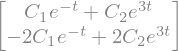

In [6]:
sol = c1*x2+c2*x1
display(sol)

In [7]:
# verificcando se a combinação linear satisfaz
A@sol==sol.diff(t)

True

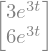

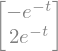

In [8]:
# Se quisermos obter as derivadas fazemos
display(x1.diff(t), x2.diff(t))

#### 10.2 Escrevendo uma ou mais EDOs de ordem maior em um sistema de 1ª ordem

Uma equação diferencial de ordem $n$,
$$
x^{(n)}=f\left(t, x, x^{\prime}, x^{\prime \prime}, \ldots, x^{(n-1)}\right),
$$
pode ser escrito de forma equivalente como um sistema equações diferenciais de primeira ordem.


Para isso, basta definir $x_1, x_2, \ldots, x_n$ da seguinte forma:
$$
x_1=x, \quad x_2=x^{\prime}, \quad x_3=x^{\prime \prime} \quad \text { e } \quad x_n=x^{(n-1)} .
$$

Assim, obtemos o sistema
$$
\begin{cases}x_1^{\prime} & =x_2, \\ x_2^{\prime} & =x_3, \\ & \vdots \\ x_{n-1}^{\prime} & =x_n, \\ x_n^{\prime} & =f\left(t, x_1, x_2, \ldots, x_n\right) .\end{cases}
$$

**Exemplo 10.2:** (Kreyszig, 2008, v.2, p 108) Modelo de movimentos livres de uma massa presa a uma mola 

$$
m y^{\prime \prime}+c y^{\prime}+k y=0 \quad \text { ou } \quad y^{\prime \prime}=-\frac{c}{m} y^{\prime}-\frac{k}{m} y .
$$

o sistema (linear e homogêneo) equivalente é

$$
\begin{aligned}
& y_1^{\prime}=y_2 \\
& y_2^{\prime}=-\frac{k}{m} y_1-\frac{c}{m} y_2
\end{aligned}
$$

**Exemplo 10.3:** A equação
$$
x'''+3 x^{\prime \prime}+2 x^{\prime}-5 x=\operatorname{sen}(2 t),
$$

tem como sistema equivalente

$$
\left\{\begin{array}{l}
x_1^{\prime}=x_2, \\
x_2^{\prime}=x_3, \\
x_3^{\prime}=5 x_1-2 x_2-3 x_3+\operatorname{sen}(2 t) .
\end{array}\right.
$$


#### 10.3 Sistemas de Coeficientes Constantes. Método do Plano de Fase

Consideremos agora um sistema com coeficientes constantes consistindo em duas EDOs

$$\mathbf{y}^{\prime}=\mathbf{A y}$$

em componentes

$$
y_1^{\prime}=a_{11} y_1+a_{12} y_2
$$

$$
y_2^{\prime}=a_{21} y_1+a_{22} y_2 .
$$

podemos obter soluções gráficas $\mathbf{y}(t)=\left[\begin{array}{l}y_1(t) \\ y_2(t)\end{array}\right]$ como duas curvas sobre o eixo $t$, uma para cada componente de $\mathbf{y}(t)$. Porém, também podemos fazer o gráfico como uma curva única no plano $y_1 y_2$. Trata-se de uma representação paramétrica (equação paramétrica) com o parâmetro $t$.
Uma curva como essa é chamada de **trajetória** (ou às vezes de órbita ou caminho). O plano $y_1 y_2$ é chamado de **plano de fase**. Se enchermos o plano de fase com trajetórias, obtemos o chamado **retrato de fase**.


A função vetorial $\mathbf{y}(t)=\left[\begin{array}{l}y_1(t) \\ y_2(t)\end{array}\right]$ é chamada **vetor de estado** do sistema. 

Para cada instante $t$ podemos plotar o vetor $\mathbf{y}(t)$ através de suas coordenadas $(y_1(t), y_2(t))$.

**Exemplo 10.4:** *Trajetórias no Plano de Fase (Retrato de Fase)*

Vamos obter e representar as soluções gráficas do sistema

$$
\mathbf{y}^{\prime}=\mathbf{A y}=\left[\begin{array}{rr}
-3 & 1 \\
1 & -3
\end{array}\right] \mathbf{y}, \quad \text { portanto, } \quad \begin{aligned}
& y_1^{\prime}=-3 y_1+y_2 \\
& y_2^{\prime}=y_1-3 y_2
\end{aligned}
$$

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(4,3)

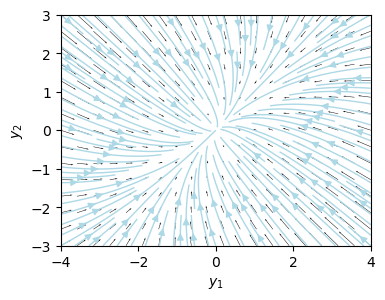

In [10]:
# coordenadas dos pontos a serem plotados
y1, y2 = np.meshgrid(np.linspace(-4, 4, 20),
                     np.linspace(-3, 3, 15))

v1 = -3*y1+y2
v2 = y1-3*y2

plt.quiver(y1, y2, v1, v2, 
           width=0.0015, angles='xy')
plt.streamplot(y1, y2, v1, v2, color='lightblue', 
               density=1.5, linewidth=1)
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')

plt.show()

As soluções no plano de fase dá uma boa impressão qualitativa geral de uma família inteira de soluções. Esse método torna-se particularmente importante nos casos em que a resolução de uma EDO ou de um sistema é inconveniente ou impossível. 

O caso desse exemplo é simples e a solução analítica pode ser obtida facilmente. Vamos plotar algumas soluções particulares e observar o comportamento que $t$ cresce, então comparar com as soluções gráficas do plano de fase.

A solução geral do sistema é dada por 

$$
\mathbf{y}=\left[\begin{array}{l}
y_1 \\
y_2
\end{array}\right]=c_1 \mathbf{y}^{(1)}+c_2 \mathbf{y}^{(2)}=c_1\left[\begin{array}{l}
1 \\
1
\end{array}\right] e^{-2 t}+c_2\left[\begin{array}{r}
1 \\
-1
\end{array}\right] e^{-4 t} .
$$

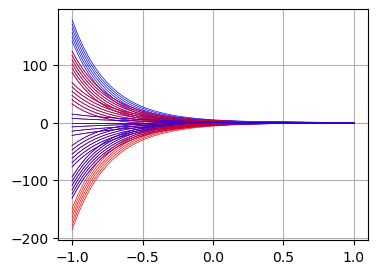

In [11]:
y1 = lambda c1,c2,t: c1*np.exp(-2*t) + c2*np.exp(-4*t)
y2 = lambda c1,c2,t: c1*np.exp(-2*t) - c2*np.exp(-4*t)

t  = np.linspace(-1,1)

fig, ax = plt.subplots()
for c1 in range(-3, 3):
    for c2 in range(-3,3):
        ax.plot(t, y1(c1,c2,t), 'r', lw=0.5)
        ax.plot(t, y2(c1,c2,t), 'b', lw=0.5)
plt.grid()

O ponto $y = 0$ parece ser um ponto comum de todas as trajetórias no plano de fase. É chamado de **ponto crítico**. Há cinco tipos de pontos críticos, dependendo da forma geométrica das 
trajetórias próximas a eles. Eles recebem os nomes de **nós impróprios**, **nós próprios**, **pontos de sela**, **centros** e **pontos espirais**. O Exemplo 10.4 é um caso de nó impróprio. 

**Exemplo 10.5:** O sistema

$$
\mathbf{y}^{\prime}=\left[\begin{array}{ll}
1 & 0 \\
0 & 1
\end{array}\right] \mathbf{y}, \quad \text { portanto, } \quad \begin{aligned}
& y_1^{\prime}=y_1 \\
& y_2^{\prime}=y_2
\end{aligned}
$$

possui um nó próprio na origem

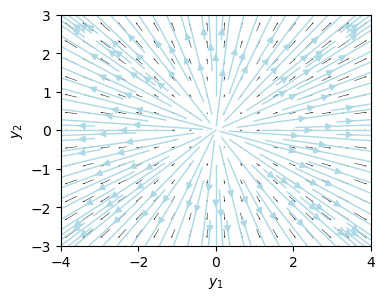

In [12]:
# coordenadas dos pontos a serem plotados
y1, y2 = np.meshgrid(np.linspace(-4, 4, 20),
                     np.linspace(-3, 3, 15))

v1 = y1; v2 = y2

plt.quiver(y1, y2, v1, v2, 
           width=0.0015, angles='xy')
plt.streamplot(y1, y2, v1, v2, color='lightblue', 
               density=1.5, linewidth=1)
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')

plt.show()

Uma solução geral é $\mathbf{y}=c_1\left[\begin{array}{l}1 \\ 0\end{array}\right] e^t+c_2\left[\begin{array}{l}0 \\ 1\end{array}\right] e^t$. Faça o gráfico de algumas soluções particulares como exercício.

**Exemplo 10.6:** 
O sistema

$$
\mathbf{y}^{\prime}=\left[\begin{array}{ll}
1 & 0 \\
0 & -1
\end{array}\right] \mathbf{y}, \quad \text { portanto, } \quad \begin{aligned}
& y_1^{\prime}=y_1 \\
& y_2^{\prime}=-y_2
\end{aligned}
$$

possui um ponto de sela na origem.

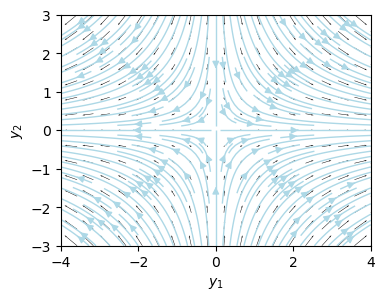

In [13]:
# coordenadas dos pontos a serem plotados
y1, y2 = np.meshgrid(np.linspace(-4, 4, 20),
                     np.linspace(-3, 3, 15))

v1 = y1; v2 = -y2

plt.quiver(y1, y2, v1, v2, 
           width=0.0015, angles='xy')
plt.streamplot(y1, y2, v1, v2, color='lightblue', 
               density=1.5, linewidth=1)
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')

plt.show()

Um ponto de sela é um ponto crítico no qual há duas trajetórias entrando, duas trajetórias saindo e todas as outras trajetórias numa vizinhança de desviam-se do ponto crítico.

Uma solução geral é $\mathbf{y}=c_1\left[\begin{array}{l}1 \\ 0\end{array}\right] e^t+c_2\left[\begin{array}{l}0 \\ 1\end{array}\right] e^{-t}$. Faça o gráfico de algumas soluções particulares como exercício.

**Exemplo 10.7:** 
O sistema

$$
\mathbf{y}^{\prime}=\left[\begin{array}{ll}
0 & 1 \\
-4 & 0
\end{array}\right] \mathbf{y}, \quad \text { portanto, } \quad \begin{aligned}
& y_1^{\prime}=y_2 \\
& y_2^{\prime}=-4*y_1
\end{aligned}
$$

possui um centro na origem.

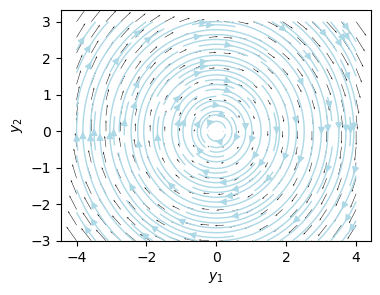

In [14]:
# coordenadas dos pontos a serem plotados
y1, y2 = np.meshgrid(np.linspace(-4, 4, 20),
                     np.linspace(-3, 3, 15))

v1 = y2; v2 = -y1

plt.quiver(y1, y2, v1, v2, 
           width=0.0015, angles='xy')
plt.streamplot(y1, y2, v1, v2, color='lightblue', 
               density=1.5, linewidth=1)
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')

plt.show()

Um centro é um ponto crítico encerrado por um número infinitamente grande de trajetórias fechadas.

Uma solução geral é $\mathbf{y}=c_1\left[\begin{array}{l}1 \\ 2i\end{array}\right] e^{2it}+c_2\left[\begin{array}{l}1 \\ -2i\end{array}\right] e^{-2it}$. 

**Exemplo 10.8:** O sistema
$$
\mathbf{y}^{\prime}=\left[\begin{array}{rr}
-1 & 1 \\
-1 & -1
\end{array}\right] \mathbf{y}, \quad \text { portanto, } \quad \begin{aligned}
& y_1^{\prime}=-y_1+y_2 \\
& y_2^{\prime}=-y_1-y_2
\end{aligned}
$$
tem um ponto espiral na origem

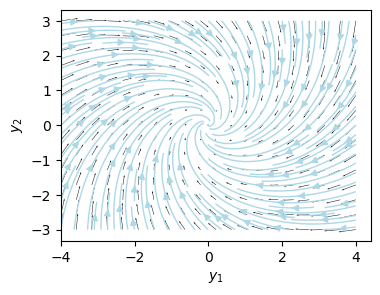

In [15]:
# coordenadas dos pontos a serem plotados
y1, y2 = np.meshgrid(np.linspace(-4, 4, 20),
                     np.linspace(-3, 3, 15))
v1 = -y1 + y2
v2 = -y1 - y2

plt.quiver(y1, y2, v1, v2, 
           width=0.0015, angles='xy')

plt.streamplot(y1, y2, v1, v2, color='lightblue', 
               density=1.5, linewidth=1)

plt.xlabel('$y_1$')
plt.ylabel('$y_2$')

plt.show()

Um ponto espiral é um ponto crítico em torno do qual as trajetórias espiralam, aproximando-se de à medida que $t \rightarrow \infty$ (ou, nos casos em que essas espirais são traçadas no sentido oposto, afastando-se).

Uma solução geral é $\mathbf{y}=c_1\left[\begin{array}{l}1 \\ i\end{array}\right] e^{(-1+i) t}+c_2\left[\begin{array}{c}1 \\ -i\end{array}\right] e^{(-1-i) t}$.

#### 10.4 Solução particular usando SymPy

**Exemplo 10.9:**

$$
\mathbf{y}^{\prime}=\mathbf{A y}=\left[\begin{array}{rr}
-3 & 1 \\
1 & -3
\end{array}\right] \mathbf{y}, \quad \text { portanto, } \quad \begin{aligned}
& y_1^{\prime}=-3 y_1+y_2 \\
& y_2^{\prime}=y_1-3 y_2
\end{aligned}
$$

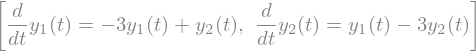

In [16]:
import sympy as sp
sp.init_printing()

t = sp.symbols('t')
y1 = sp.Function('y1')
y2 = sp.Function('y2')
eqs = [sp.Eq(sp.Derivative(y1(t), t), -3*y1(t) + y2(t)),
       sp.Eq(sp.Derivative(y2(t), t),  y1(t) - 3*y2(t))]
eqs

In [17]:
sol = sp.dsolve(eqs,[y1(t), y2(t)])
sol

Os sistemas para os quais campos de direções e representações de trajetórias são especialmente úteis são os sistemas os sistemas ditos **autônomos**. Para que o sistema dado na forma matricial

$$
\frac{d \mathbf{x}}{d t}=\mathbf{A x}+\mathbf{b}
$$

seja autônomo, todos os elementos da matriz de coeficientes $\mathbf{A}$ e as componentes do vetor $\mathbf{b}$ têm que ser constantes.


#### 10.5 Sistemas autônomos de duas EDOs

Frequentemente é útil encontramos as soluções de equilíbrio, ou pontos críticos, de sistemas autônomos. Fazemos isto igualando $dx/dt$ a zero. Dessa forma, obtemos o sistema linear algébrico

$$
\mathbf{A x}=-\mathbf{b}
$$

Se a matriz de coeficientes $\mathbf{A}$ tem inversa, então o sistema tem uma única solução, o único ponto crítico do sistema. No entanto, se $\mathbf{A}$ é singular, então o sistema não tem solução ou tem uma infinidade de soluções.

O comportamento das trajetórias na vizinhança de pontos críticos pode ser determinado por métodos algébricos, assim, podem-se obter muitas informações sobre as soluções de sistemas autônomos sem ter que resolver o sistema.


Sistemas de equações lineares de 1ª ordem podem ser solucionados usando autovalores e autovetores.

**Exemplo 10.10:** (Adaptado de [BRANNAN e BOYCE, 2008, p.127](https://integrada.minhabiblioteca.com.br/reader/books/978-85-216-2337-3/pageid/148))

Considere os dois tanques interligados, conforme a figura abaixo, contendo em $t=0$ as quantidades de sal $Q_1(0)=55$ e $Q_2(0)=26$ ($t$ em minutos, $Q_1$ e $Q_2$ em onças). A variação de sal em cada tanque é devida, completamente, ao fluxo que entra e sai do tanque, de modo que podemos aplicar o princípio de balanceamento a cada tanque:

*taxa de variação do sal em um tanque = taxa de entrada de sal - taxa de saída de sal*

obtendo assim as equações diferenciais.

$$ \frac{dQ_1}{dt}=-0,1 Q_1 + 0,075 Q_2 + 1,5$$

$$ \frac{dQ_2}{dt}=0,1 Q_1 + 0,2 Q_2 + 3$$


O par de equações diferenciais acima, junto com as condições iniciais, constituem um modelo matemático do fluxo entre os dois tanques. Se pudermos resolver estas equações para $Q_1(t)$ e $Q_2(t)$, seremos capazes de prever quanto sal estará em cada tanque em qualquer tempo futuro.

<img src="imagens/galoes.png" width="480">

*(Um galão americano corresponde a cerca de 3,785 litros; uma onça corresponde a cerca de 28,349 gramas. Abreviaremos galão por gal e onças por oz)*

Em notação matricial:

$$
\begin{pmatrix}dQ_1/dt\\ dQ_2/dt \end{pmatrix} =
\begin{pmatrix} -0,1 & 0,075 \\ 0,1 & -0,2 \end{pmatrix}
{Q_1 \choose Q_2} + 
{1,5 \choose 3}.
$$

Definindo as matrizes 

$$\textbf{Q}={Q_1\choose Q_2,}, \quad \textbf{K}=\begin{pmatrix} -0,1 & 0,075 \\ 0,1 & -0,2 \end{pmatrix},\quad \textbf{b} = {1,5\choose 3},$$ 

ou

$$\frac{d\textbf{Q}}{dt} = \textbf{KQ} + \textbf{b}$$



As variáveis $Q_1$ e $Q_2$ são chamadas de variáveis de estado, já que seu valor em qualquer instante $t$ descreve o estado do sistema, isto é, neste caso, a quantidade de sal em cada tanque. Da mesma forma, o vetor $\textbf{Q} =Q_1 \textbf{i} + Q_2 \textbf{j}$ é chamado de vetor de estado do sistema. O plano $Q_1Q_2$ é denominado o **plano de estados**, ou de maneira mais corriqueira, o **plano de fase**. À medida que o tempo corre, a ponta do vetor Q descreve uma curva no plano de fase. Esta curva é chamada de **trajetória** ou **órbita**, e descreve graficamente a variação do estado ou a evolução do sistema.

Existem três tipos de gráficos que podem ser muito úteis para a visualização do comportamento de soluções de um sistema de duas equações diferenciais de 1ª ordem. Um é um campo de direções no plano $Q_1Q_2$, que pode ser desenhado escolhendo um ponto $\textbf{Q}=(Q_1,Q_2)$ e calculando a expressão à direita do sinal de igualdade, a saber, $\textbf{KQ} + \textbf{b}$, naquele ponto. O resultado é o vetor $d\textbf{Q}/dt$ no ponto dado. Este vetor é tangente à trajetória que contém o ponto ($Q_1$,$Q_2$). Desenhando este vetor como uma seta começando no ponto dado, somos capazes de mostrar a direção e o sentido da solução contendo o ponto. Repetindo este cálculo em muitos pontos, obtemos o gráfico


In [18]:
x,y = np.meshgrid(np.linspace(0,50,26),
                  np.linspace(0,50,26))

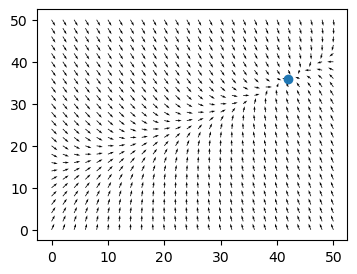

In [19]:
u = -0.1*x+0.075*y+1.5
v =  0.1*x-0.2*y+3

# normalizando as setas
u = u / np.sqrt(u**2 + v**2);
v = v / np.sqrt(u**2 + v**2);

plt.quiver(x, y, u, v)
plt.plot(42,36,'o')
plt.show()

Encontrando uma solução particular  com `sympy`

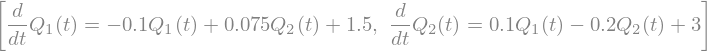

In [20]:
t = sp.symbols('t')
Q1 = sp.Function('Q1')
Q2 = sp.Function('Q2')
eqs = [sp.Eq(sp.Derivative(Q1(t), t), -0.1*Q1(t) + 0.075*Q2(t) + 1.5),
       sp.Eq(sp.Derivative(Q2(t), t),  0.1*Q1(t) - 0.2*Q2(t) + 3)]
eqs

In [21]:
sol = sp.dsolve(eqs,[Q1(t), Q2(t)], ics={Q1(0): 55, Q2(0): 26})
sol

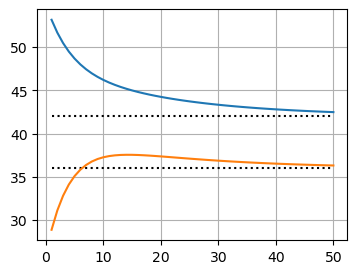

In [22]:
ti = np.linspace(1,50) 

q1 = sp.lambdify(t, sol[0].rhs)
q2 = sp.lambdify(t, sol[1].rhs)

plt.hlines((42,36), ti[0], ti[-1], colors='black', linestyles=':',)
plt.plot(ti, q1(ti), ti, q2(ti))
plt.grid()

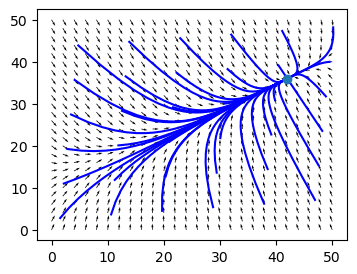

In [23]:
for v1 in np.linspace(0, 50, 6):
    for v2 in np.linspace(0, 50, 6):
        sol1, sol2 = sp.dsolve(eqs, [Q1(t), Q2(t)], ics={Q1(0): v1, Q2(0): v2})
        q1 = sp.lambdify(t, sol1.rhs)
        q2 = sp.lambdify(t, sol2.rhs)
        plt.plot(q1(ti), q2(ti), 'b-')
        
plt.quiver(x, y, u, v)
plt.plot(42,36,'o')
plt.show()

Podemos encontrar o ponto crítico desse sistema resolvendo o sistema linear


$$
\left(\begin{array}{rr}
-0,1 & 0,075 \\
0,1 & -0,2
\end{array}\right)\binom{Q_1}{Q_2}=-\binom{1,5}{3}
$$

que fornece
$$
Q_1(0)=42 \quad \text{e} \quad Q_2(0)=36.
$$

#### Exercícios:

**1.** Plote os campos de vetores, fluxos e trajetórias associados à equação diferencial

$$
\begin{cases}
y_1' = y_1 + y_2 \\
y_2' = 4y_1 + y_2
\end{cases}
$$

no retângulo $x\in[-4,4],\ y\in[-4,4]$.

**2.** Plote o campo de direções para o sistema abaixo, depois encontre a solução geral  e faça o gráfico de diversas trajetórias no plano de fase.

$$
\begin{cases}
y_1' = -3y_1 + \sqrt{2} y_2 \\
y_2' = \sqrt{2}y_1 + -2y_2
\end{cases}
$$

**3.** ([Fonte](https://integrada.minhabiblioteca.com.br/reader/books/978-85-216-2337-3/pageid/156)) Em cada um dos problemas a seguir, $(i)$ encontre a solução de equilíbrio (ponto crítico); $(ii)$ desenhe o campo de direções centrado no ponto crítico; e $(iii)$ descreva o comportamento das soluções na vizinhança do ponto crítico.

$\begin{aligned} 
&\text{(a)} \quad x^{\prime}=-x+y+1, \quad y^{\prime}=x+y-3 \\ 
&\text{(b)} \quad x^{\prime}=-x-4 y-4, \quad y^{\prime}=x-y-6 \\ 
&\text{(c)} \quad x^{\prime}=-0,25 x-0,75 y+8 \\ 
&\text{(d)} \quad y^{\prime}=0,5 x+y-11,5 \\ 
&\text{(e)} \quad x^{\prime}=-2 x+y-11, \quad y^{\prime}=-5 x+4 y-35 \\ 
&\text{(f)} \quad x^{\prime}=x+y-3, \quad y^{\prime}=-x+y+1 \\ 
&\text{(g)} \quad x^{\prime}=-5 x+4 y-35, \quad y^{\prime}=-2 x+y-11
\end{aligned}$

**4.** (Adaptado de [Boyce, 2020](https://integrada.minhabiblioteca.com.br/reader/books/9788521637134/epubcfi/6/38%5B%3Bvnd.vst.idref%3Dchapter07%5D!/4/550/6/11:14%5Bepr%2Cese%5D)) Para cada um dos sistemas homogêneos dados abaixo, verifique se as funções fetoriais $\mathbf{x}^{(1)}$ e  $\mathbf{x}^{(2)}$ são soluções. Em caso afirmativo, verifique que a combinação linear das soluções também é um solução.

a) $\mathbf{x}^{\prime}=\left(\begin{array}{ll}2 & -1 \\ 3 & -2\end{array}\right) \mathbf{x} ; \mathbf{x}^{(1)}=\binom{1}{1} e^{-3 t}, x^{(2)}=\binom{1}{3} e^{-t}$
   
b) $\mathbf{x}^{\prime}=\left(\begin{array}{rr}1 & 1 \\ 4 & -2\end{array}\right) \mathbf{x} ; \mathbf{x}^{(1)}=\binom{1}{-4} e^{-3 t}, \mathbf{x}^{(2)}=\binom{1}{1} e^{2 t}$

c) $\mathbf{x}^{\prime}=\left(\begin{array}{cc}2 & -5 \\ 1 & -2\end{array}\right) \mathbf{x} ; \mathbf{x}^{(1)}=\binom{5 \cos t}{2 \cos t+\operatorname{sn} t}, \mathbf{x}^{(2)}=\binom{5 \operatorname{sen} t}{2 \operatorname{sen} t-\cos t}$

d) $\mathbf{x}^{\prime}=\left(\begin{array}{ll}4 & -2 \\ 8 & -4\end{array}\right) \mathbf{x} ; \mathbf{x}^{(1)}=\binom{2}{4}, \mathbf{x}^{(2)}=\binom{2}{4} t+\binom{0}{1}$

e) $t \mathbf{x}^{\prime}=\left(\begin{array}{ll}2 & -1 \\ 3 & -2\end{array}\right) \mathbf{x}(t>0) ; \mathbf{x}^{(1)}=\binom{1}{1} t, x^{(2)}=\binom{1}{3} t^{-1}$

f) $t \mathbf{x}^{\prime}=\left(\begin{array}{ll}3 & -2 \\ 2 & -2\end{array}\right) \mathbf{x}(t>0) ; \mathbf{x}^{(1)}=\binom{1}{2} t^{-1}, \mathbf{x}^{(2)}=\binom{2}{1} t^2$

**5.** ([Fonte](https://integrada.minhabiblioteca.com.br/reader/books/978-85-216-2337-3/pageid/156)) Em cada um dos problemas a seguir, $(i)$ encontre a solução de equilíbrio (ponto crítico); $(ii)$ desenhe o campo de direções centrado no ponto crítico; e $(iii)$ descreva o comportamento das soluções na vizinhança do ponto crítico.

$\begin{aligned} 
&\text{(a)} \quad x^{\prime}=-x+y+1, \quad y^{\prime}=x+y-3 \\ 
&\text{(b)} \quad x^{\prime}=-x-4 y-4, \quad y^{\prime}=x-y-6 \\ 
&\text{(c)} \quad x^{\prime}=-0,25 x-0,75 y+8 \\ 
&\text{(d)} \quad y^{\prime}=0,5 x+y-11,5 \\ 
&\text{(e)} \quad x^{\prime}=-2 x+y-11, \quad y^{\prime}=-5 x+4 y-35 \\ 
&\text{(f)} \quad x^{\prime}=x+y-3, \quad y^{\prime}=-x+y+1 \\ 
&\text{(g)} \quad x^{\prime}=-5 x+4 y-35, \quad y^{\prime}=-2 x+y-11
\end{aligned}$

**(Extra) Exercício resolvido:** (Roubado de: https://github.com/guerinileonardo)

É importante que a temperatura de uma estufa se mantenha amena mesmo à noite, para criar as condições corretas para o desenvolvimento das plantas. Para isso, é criado um sistema de ventilação da seguinte forma.

Próximo à estufa, é construído um leito de rochas abaixo do solo, junto com isolantes térmicos. Assim, as rochas acumulam calor do sol durante o dia. 

À noite, o ar da estufa é ventilado através dessas rochas antes de retornar à estufa, com isso mantendo sua temperatura um pouco mais alta de maneira simples e barata.

<br>

<img src="imagens/estufa.png" width="400">

<br>

Denotando por 

$$u_1(t),\quad u_2(t)$$ 

a temperatura do leito de rochas e a temperatura do ar dentro da estufa no instante $t$, e levando em conta as massas de ar em cada local, a superfície de contato, o coeficiente de transferência de calor, os calores específicos e a temperatura externa, utilizamos a lei da conservação de energia para chegar às seguintes equações diferenciais ordinárias:

$$
\begin{cases}
\frac{du_1}{dt} = -\frac{13}{8}u_1 + \frac34 u_2 + 14 \\ \\
\frac{du_2}{dt} = \frac{1}{4}u_1 - \frac14 u_2.
\end{cases}
$$

Note que ambas as variações $\frac{du_1}{dt}, \frac{du_2}{dt}$ dependem tanto da temperatura da estufa $u_1$ quanto da temperaturas do leito de pedras $u_2$.

Em notação matricial:

$$
\begin{pmatrix}\frac{du_1}{dt}\\ \frac{du_2}{dt} \end{pmatrix} =
\begin{pmatrix} -\frac{13}{8} & \frac34 \\ \frac{1}{4} & -\frac14 \end{pmatrix}
{u_1 \choose u_2} + 
{14 \choose 0}.
$$

Definindo as matrizes 

$$\textbf{u}={u_1\choose u_2,}, \quad \textbf{K}=\begin{pmatrix} -\frac{13}{8} & \frac34 \\ \frac{1}{4} & -\frac14 \end{pmatrix},\quad \textbf{b} = {14 \choose 0},$$ 

escrevemos o sistema linear de equações diferenciais

\begin{align}
\frac{d\textbf{u}}{dt} &= f(\textbf{u}, t) \\
&= \textbf{Ku} + \textbf{b}.
\end{align}

<br>

Vamos assumir que o sistema de ventilação é acionado a partir de um instante $t=0$ no início do anoitecer, quando a estufa está a $0^o$C e o leito de rochas está a $36^o$C. Assim, é esperado que a estufa vá retirando calor do leito de pedras.

Denotamos as temperaturas iniciais em cada local pelo vetor

$$
\textbf{u}(0) = {{u_1(0)} \choose {u_2(0)}} = {0 \choose 36}.
$$

É possível verificar que a função vetorial

$$
\textbf{u}(t) = {u_1(t) \choose u_2(t)} = {8e^{-t/8} - 24e^{-7t/4} + 16 \choose 16e^{-t/8} + 4e^{-7t/4} + 16} = 8e^{-t/8}{1 \choose 2} -4e^{-7t/4}{6 \choose -1} + {16 \choose 16}
$$

é uma solução para problema de valor inicial dado pelo sistema acima juntamente com a condição inicial indicada.

Assim, vemos que no limite em que $t \rightarrow \infty$, temos

$$
\lim_{t \rightarrow \infty}\textbf{u}(t) = {16 \choose 16}.
$$

Vamos plotar o gráfico das funções $u_1(t), u_2(t)$ encontradas, no intervalo entre $t=0$ e $t=30$.

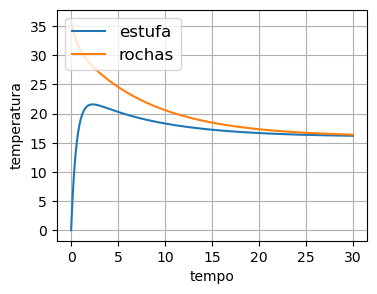

In [25]:
# aumentando o tamanho do gráfico plotado
#plt.rcParams['figure.figsize'] = [12, 6]

dom = np.linspace(0, 30, 200)
plt.plot(dom, 8*np.exp(-dom/8) - 24*np.exp(-7*dom/4) + 16, label='estufa')
plt.plot(dom, 16*np.exp(-dom/8) + 4*np.exp(-7*dom/4) + 16, label='rochas')
plt.legend(loc=2, prop={'size': 12})
plt.xlabel('tempo')
plt.ylabel('temperatura')
plt.grid()
plt.show()

#### Referências

BRANNAN, James R.; BOYCE, William E. Equações Diferenciais uma Introdução a Métodos Modernos e suas Aplicações. São Paulo: Grupo GEN, 2008. E-book. ISBN 978-85-216-2337-3. Disponível em: https://integrada.minhabiblioteca.com.br/#/books/978-85-216-2337-3/. Acesso em: 18 jun. 2024.